In [1]:
from IPython.display import Audio, display
import plotly.express as px
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]="7"

import glob
import torch
import matplotlib.pyplot as pltm
sys.path.append("../")

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from configs.whisper_characterwise_pretrained_augs_small_openasr_concataug import Configs
CFG = Configs()

length of train: 989602, length of valid: 2369


In [ ]:
(torch.Size([80, 208]), torch.Size([21]))

torch.Size([80, 383]) torch.Size([70])
<start>নায়না, আমি তোমার বিচার পাইয়ে দিবো। ওহ, আচ্ছা, গুরুত্বপূর্ণ হতে পারে।<end>


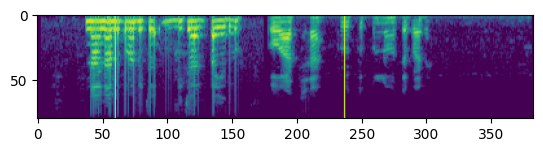

In [82]:
inp = CFG.train_dataset[1]
print(inp[0].shape,inp[1].shape)
plt.imshow(inp[0].numpy())
print(CFG.tokenizer.decode_torch_inference(inp[1]))

In [8]:
CFG.training_data.lengths.dropna().max()

388800.0

In [9]:
388800//238

1633

In [43]:
CFG.mel_transorm_train(np.load("/app/dataset/train_numpy_16k/ffffe1b5f095.npy")).shape

(80, 381)

In [5]:
from trainer.whisper_fintune_trainer import Trainer
CFG.DISTRIBUTED = False
tn = Trainer(CFG)

No model checkpoints found,loading whisper checkpoint
Ignored keys from the checkpoint:

Keys with size mismatch:
decoder.token_embedding.weight
Using collate function..
Autoregressive inference: True


In [6]:
dloader = iter(tn.train_loader)
z = next(dloader)

In [14]:
z[0].shape,z[1].shape,z[2].shape

(torch.Size([12, 80, 315]), torch.Size([12, 35]), torch.Size([12, 35]))

In [7]:
VOCAB = {}
for v in CFG.training_data.sentence:
    for i in v:
        if i not in VOCAB:
            VOCAB[i]=0
        VOCAB[i]+=1

In [ ]:
from trainer.wav2vec2_fintune_ctc_trainer import Trainer

In [6]:
CFG.DISTRIBUTED=False
train = Trainer(CFG)

freezing encoder layer....
Using collate function..
Autoregressive inference: False


In [7]:
loader = iter(train.train_loader)

In [8]:
# def hook_fn(module, input, output):
#     # Check if output has NaN
#     if torch.isnan(output if type(output) is not tuple else output[0]).any():
#         i = input if type(input) is not tuple else input[0] 
#         print(f"NaN detected in layer: {module}, {i.dtype}")


# # Attach hook to each layer of the model
# def register_hooks(model):
#     for layer in model.children():
#         layer.register_forward_hook(hook_fn)
#         # Recursively attach hooks to child modules (if any)
#         register_hooks(layer)
# register_hooks(CFG.model.decoder)

In [9]:
z = next(loader)
[tt.shape for tt in z]
[tt.dtype for tt in z]
with torch.no_grad():
    pred1 =  CFG.model.encoder(z[0].cuda().float())
    pred = CFG.model(z[0].cuda().float(),z[1].cuda().long())
pred

tensor([[[-2.0314e+00,  1.5075e+01,  2.3425e+01,  ..., -2.4114e+01,
           7.1811e+02, -7.6288e+00],
         [-5.6977e+01, -1.6832e+01,  2.1679e+01,  ...,  6.9561e+00,
           7.6605e+00, -6.3598e+01],
         [ 8.5729e+02,  6.2141e+01, -4.1696e+01,  ..., -2.1628e+01,
           1.6159e+01, -1.2867e+01],
         ...,
         [ 1.8641e+01,  5.2420e+01,  4.0240e+01,  ..., -1.9979e+01,
          -3.7469e+00,  7.8768e+02],
         [ 1.8725e+01,  5.0133e+01,  3.9324e+01,  ..., -1.8752e+01,
          -3.1854e+00,  7.8618e+02],
         [ 1.8994e+01,  5.1450e+01,  3.8759e+01,  ..., -1.8991e+01,
          -4.0456e+00,  7.8531e+02]],

        [[-2.7813e+00,  1.5405e+01,  2.3538e+01,  ..., -2.4422e+01,
           7.1790e+02, -7.2925e+00],
         [-3.6996e+01,  2.8463e+01,  6.6646e+01,  ..., -1.2842e+01,
           7.2116e+01, -4.0349e+00],
         [ 5.0165e+01, -3.7805e+01,  2.0916e+00,  ...,  3.7272e+01,
           3.5184e+01, -9.2115e+00],
         ...,
         [ 1.4836e+01,  5